<a href="https://colab.research.google.com/github/plaban1981/Hugging_Face_transformers_topics/blob/main/Semantic_Search_to_find_GIFs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Semantic Search to find GIFs
![apitest.JPG](https://media0.giphy.com/media/l2JdUrmFPxNZZiWYM/200.webp?cid=ecf05e47wxws9x3dhd4kli8aul827nfz3quzmv0b4z952cnn&rid=200.webp&ct=g)![](https://media3.giphy.com/media/l2JdTdyXLywTF4Rzy/200.webp?cid=ecf05e47wxws9x3dhd4kli8aul827nfz3quzmv0b4z952cnn&rid=200.webp&ct=g)![](https://media4.giphy.com/media/l2JejluW5XwavZ9vi/200.webp?cid=ecf05e47wxws9x3dhd4kli8aul827nfz3quzmv0b4z952cnn&rid=200.webp&ct=g)![](https://media1.giphy.com/media/xT5LMABjQIDtLsvMeQ/200.webp?cid=ecf05e47wxws9x3dhd4kli8aul827nfz3quzmv0b4z952cnn&rid=200.webp&ct=g)![](https://media4.giphy.com/media/l2JdYe5Cg5pjxNy2k/200.webp?cid=ecf05e47wxws9x3dhd4kli8aul827nfz3quzmv0b4z952cnn&rid=200.webp&ct=g)![](https://media3.giphy.com/media/3orif2731IczhgNv5S/200.webp?cid=ecf05e47wxws9x3dhd4kli8aul827nfz3quzmv0b4z952cnn&rid=200.webp&ct=g)

## What is Semantic Search ?
Semantic search in NLP is a type of search technology that uses natural language processing techniques to understand the meaning and context of the words used in a query, and to match them with relevant documents or content based on their semantic meaning, rather than just their literal text. It aims to deliver more accurate and relevant search results by considering the context and relationships between words, concepts, and entities in the query and the search content. This approach helps to overcome the limitations of traditional keyword-based search and improve the overall user experience.

## Types of Semantic Search ?

#### There are mainly two types of semantic search in NLP:

* **Structured semantic search**: This type of semantic search leverages pre-existing structures, such as ontologies, taxonomies, or knowledge graphs, to map and categorize search terms and search results, and to determine their relationships and similarities.

* **Unstructured semantic search**: This type of semantic search uses machine learning and NLP techniques to analyze and understand the meaning and context of unstructured or loosely structured data, such as text or web pages, and to match them with relevant search results based on their semantic meaning. It often involves techniques such as text mining, natural language processing, and entity recognition to identify and extract relevant information from the data.

Both structured and unstructured semantic search aim to enhance the accuracy and relevance of search results by considering the meaning and context of the query and the search content.

## Which of the following two sentences are the most similar?

A: the stock market took a turn for the worse 

B: how did the stock market do today? 

C: the stock market performed worse than expected

* If we wanted to find phrases with similar meaning then the obvious choice would be A and C. 
Matching those with B would make little sense. 

* However, this is not the case if we are searching for similar question-answer pairs; in that case, B should match very closely with A and C.



Here we will use NLP base Semantic serch to find GIFs. The same pipeline can be extended / adapted for other search based usecases like serching financial documents, Image based search,video search etc.

In order to find semantic similarity we will transform our phrases into dense vector embeddings. 

These dense vectors can be stored in a vector database where we can very quickly compare vectors and identify those that are most similar based on metrics like Euclidean distance and cosine similarity.

## Search Pipeline 
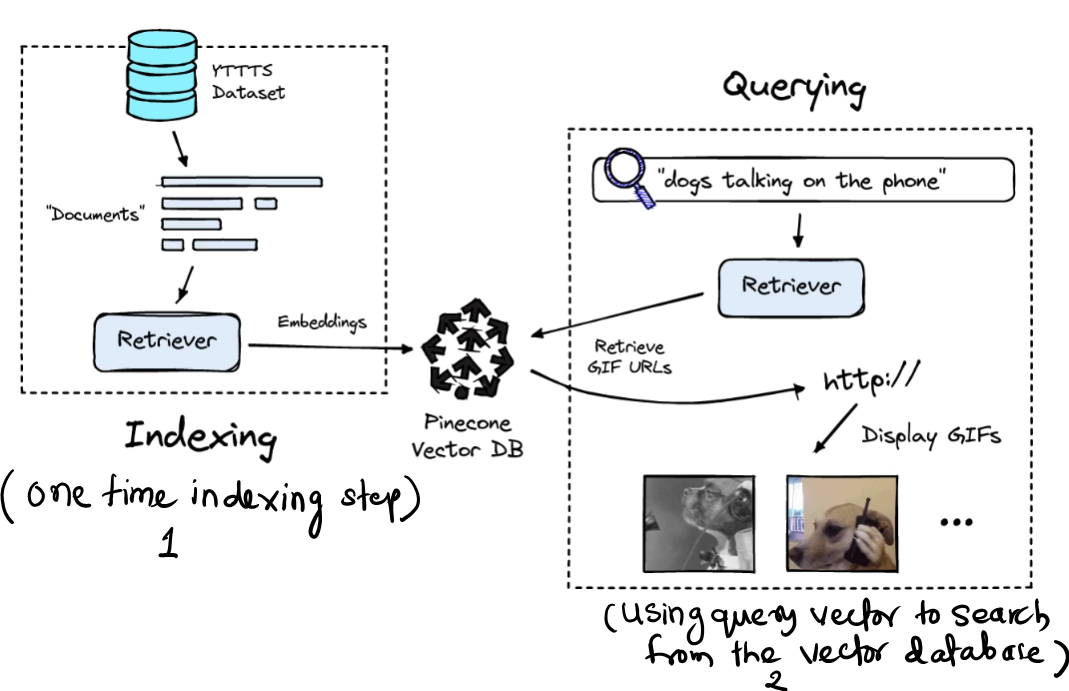

#### The GIF search tool with just two components:

* a **retriever** to embed GIF descriptions
* a **vector database** to store GIF description embeddings and retrieve relevant GIFs



The vector database handles the storage and fast search of our vector embeddings, but we still need a way to create these embeddings.


To create vector embeddings we use NLP transformer models called **retrievers** that are fine-tuned for creating sentence embeddings. These sentence embeddings/vectors are able to numerically represent the meaning behind the text that they represent.


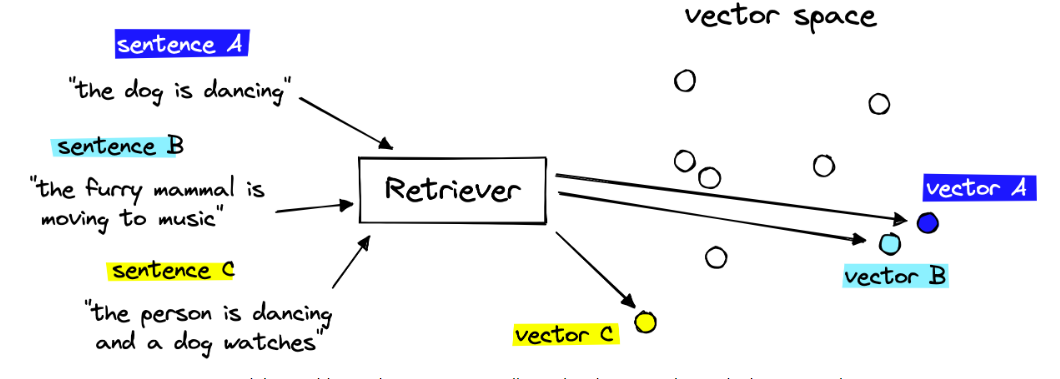

Retriever models are able to take two semantically similar phrases and encode them as similar vectors.

## Install required libraries

In [ ]:
! pip install  pinecone-client sentence-transformers 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.8 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=34323868a913d7087105d62a060e8a8e7400b2867052a498e526b6fa50bf7017
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfull

##  Set the following notebook parameters to display the GIF images

In [ ]:
from IPython.display import HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Download and Extract Dataset

Here we will be using the TGIF dataset found on [GitHub]( https://github.com/raingo/TGIF-Release/archive/master.zip) here. 

To get the dataset we can use wget (alternatively, download it manually), and unzip.

In [ ]:
# Use wget to download the master.zip file which contains the dataset
!wget https://github.com/raingo/TGIF-Release/archive/master.zip

--2023-02-03 05:30:29--  https://github.com/raingo/TGIF-Release/archive/master.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/raingo/TGIF-Release/zip/refs/heads/master [following]
--2023-02-03 05:30:29--  https://codeload.github.com/raingo/TGIF-Release/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 20.27.177.114
Connecting to codeload.github.com (codeload.github.com)|20.27.177.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [     <=>            ]  11.82M  5.66MB/s    in 2.1s    

2023-02-03 05:30:32 (5.66 MB/s) - ‘master.zip’ saved [12396861]



In [ ]:
# Use unzip to extract the master.zip file
!unzip master.zip

Archive:  master.zip
3e54d2f71418d8a2e9f5f61aa5be0edb9c0ac2b8
   creating: TGIF-Release-master/
  inflating: TGIF-Release-master/.gitignore  
  inflating: TGIF-Release-master/.gitmodules  
  inflating: TGIF-Release-master/LICENSE  
  inflating: TGIF-Release-master/README.md  
   creating: TGIF-Release-master/code/
  inflating: TGIF-Release-master/code/README.md  
   creating: TGIF-Release-master/code/crowdflower/
 extracting: TGIF-Release-master/code/crowdflower/.gitignore  
  inflating: TGIF-Release-master/code/crowdflower/.gitmodules  
  inflating: TGIF-Release-master/code/crowdflower/README.md  
   creating: TGIF-Release-master/code/crowdflower/back-end/
  inflating: TGIF-Release-master/code/crowdflower/back-end/.gitignore  
  inflating: TGIF-Release-master/code/crowdflower/back-end/deploy.sh  
  inflating: TGIF-Release-master/code/crowdflower/back-end/entity_extract.py  
  inflating: TGIF-Release-master/code/crowdflower/back-end/eval.py  
   creating: TGIF-Release-master/code/crowd

## Explore the Dataset

In [ ]:
import pandas as pd
# Load dataset to a pandas dataframe
df = pd.read_csv("./TGIF-Release-master/data/tgif-v1.0.tsv",delimiter="\t",names=['url', 'description'])
df.head()

,url,description
0,https://38.media.tumblr.com/9f6c25cc350f12aa74...,"a man is glaring, and someone with sunglasses ..."
1,https://38.media.tumblr.com/9ead028ef62004ef6a...,a cat tries to catch a mouse on a tablet
2,https://38.media.tumblr.com/9f43dc410be85b1159...,a man dressed in red is dancing.
3,https://38.media.tumblr.com/9f659499c8754e40cf...,an animal comes close to another in the jungle
4,https://38.media.tumblr.com/9ed1c99afa7d714118...,a man in a hat adjusts his tie and makes a wei...


In [ ]:
df.shape

(125782, 2)

In [ ]:
# Number of *unique* GIFs in the dataset
df["url"].nunique()

102068

**Note** :  the dataset does not contain the actual GIF files. But it has URLs we can use to download/access the GIF files. 

This is great as we do not need to store/download all the GIF files. We can directly load the required GIF files using the URL when displaying the search results.

The dataset contains GIF URLs and their descriptions in natural language. We can take a look at the first five GIFs.

In [ ]:
dup = df['url'].value_counts().sort_values(ascending=False).to_dict()

In [ ]:
u = []
c = []
for k,v in dup.items():
  u.append(k)
  c.append(v)

In [ ]:
dupes = pd.DataFrame.from_dict({'url':u,'count':c})
dupes

,url,count
0,https://38.media.tumblr.com/ddbfe51aff57fd8446...,4
1,https://33.media.tumblr.com/46c873a60bb8bd97bd...,4
2,https://38.media.tumblr.com/b544f3c87cbf26462d...,4
3,https://33.media.tumblr.com/88235b43b48e9823ee...,4
4,https://31.media.tumblr.com/69bca8520e1f03b414...,4
...,...,...
102063,https://38.media.tumblr.com/fbd17abac50a77efa3...,1
102064,https://38.media.tumblr.com/1259996a566faccb4c...,1
102065,https://33.media.tumblr.com/ebe9f74fccfb475506...,1
102066,https://33.media.tumblr.com/ec3f93d0a68d62d720...,1


* The above does not necessarily indicate duplicate records as a single GIF can be assigned multiple

In [ ]:
dupe_url = dupes.loc[0]['url']
dupe_df = df[df['url'] == dupe_url]
dupe_df

,url,description
1054,https://38.media.tumblr.com/ddbfe51aff57fd8446...,man is running fast next to woman running fast
1055,https://38.media.tumblr.com/ddbfe51aff57fd8446...,shapely athletic young woman is running as an ...
109031,https://38.media.tumblr.com/ddbfe51aff57fd8446...,a woman is running through the woods and an ov...
120496,https://38.media.tumblr.com/ddbfe51aff57fd8446...,a girl ran through the woods and a fat guy pas...


In [ ]:
# let's take a look at this GIF and it's duplicated descriptions
for _, gif in dupe_df.iterrows():
    HTML(f"<img src={gif['url']} style='width:120px; height:90px'>")
    print(gif["description"])

man is running fast next to woman running fast


shapely athletic young woman is running as an overweight man passes her


a woman is running through the woods and an overweight man runs past her.


a girl ran through the woods and a fat guy passed her.


In [ ]:
for _, gif in df[:5].iterrows():
  HTML(f"<img src={gif['url']} style='width:120px; height:90px'>")
  print(gif["description"])

a man is glaring, and someone with sunglasses appears.


a cat tries to catch a mouse on a tablet


a man dressed in red is dancing.


an animal comes close to another in the jungle


a man in a hat adjusts his tie and makes a weird face.


## Initializing Components

#### Initialize Pinecone Index

The vector database stores vector representations of our GIF descriptions which we can retrieve using another vector (query vector). 

We will use the Pinecone vector database, a fully managed vector database that can store and search through billions of records in milliseconds. 

We could use any other vector database such as FAISS to build this tool. But in that case we may need to manage the database ourselves.

To initialize the database, we sign up for a free [Pinecone API key](https://app.pinecone.io/organizations) and pip install pinecone-client. Once ready, we initialize our index with:

In [46]:
import pinecone

# Connect to pinecone environment
pinecone.init(
    api_key="d7f7ba67-9483-4026-a189-b0547e9ca5ff",
    environment="us-west1-gcp"
)

index_name = 'gif-search'

# check if the gif-search exists
if index_name not in pinecone.list_indexes():
    # create the index if it does not exist
    pinecone.create_index(
        index_name,
        dimension=384,
        metric="cosine"
    )

# Connect to gif-search index we created
index = pinecone.Index(index_name)

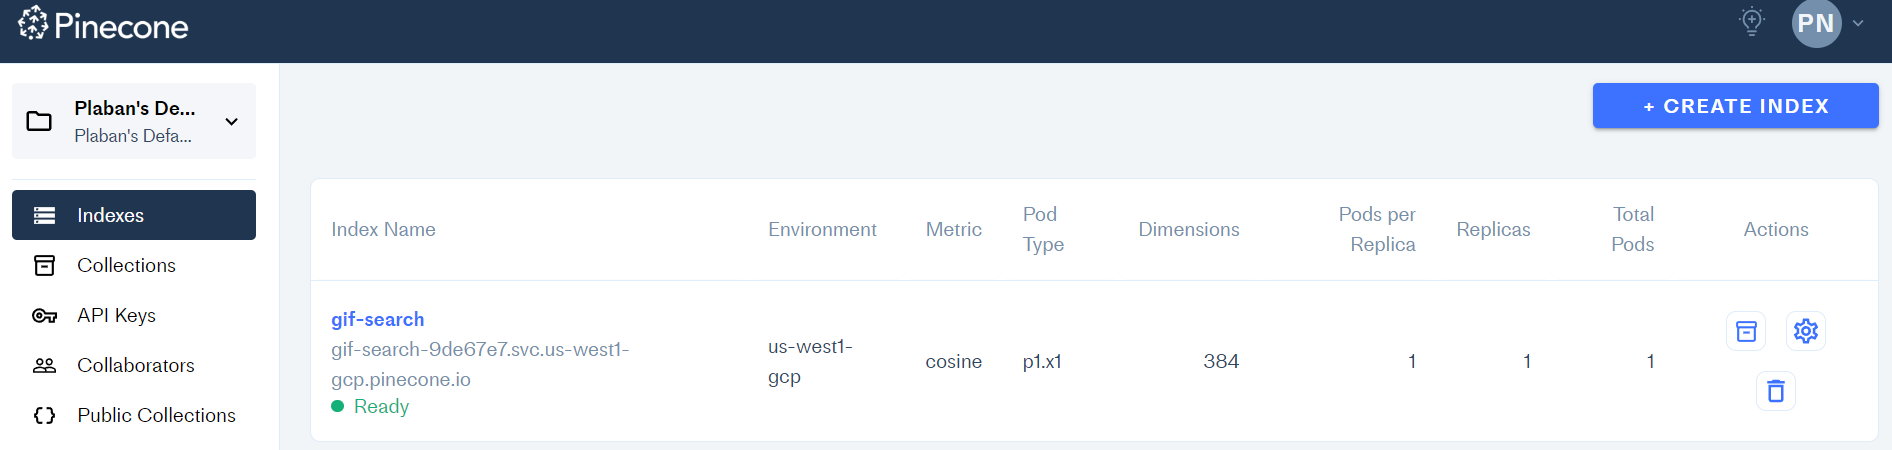

#### Initialize Retriever
Next, we need to initialize our retriever. The retriever will mainly do two things:

* Generate embeddings for all the GIF descriptions (context vectors/embeddings)
* Generate embeddings for the query (query vector/embedding)


The retriever will generate the embeddings in a way that the queries and GIF descriptions with similar meanings are in a similar vector space. 

Then we can use cosine similarity to calculate this similarity between the query and context embeddings and find the most relevant GIF to our query.

Here we will use a SentenceTransformer model trained based on **Microsoft's MPNet** as our retriever. 

This model performs well out-of-the-box when searching based on generic semantic similarity.

In [47]:
from sentence_transformers import SentenceTransformer
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Initialize retriever with SentenceTransformer model 
retriever = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
retriever.to(device)

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

## Generate Embeddings and Upsert
Now that our retriever and the pinecone index are initialized. 

* Next, we need to generate embeddings for the GIF descriptions. 
* We will do this in batches to help us more quickly generate embeddings. This means our retriever will generate embeddings for 64 GIF descriptions at once instead of generating them individually (much faster) and send a single API call for each batch of 64 (also much faster).

* When passing the documents to pinecone, we need an id (a unique value), embedding (embeddings for the GIF descriptions we have generated earlier), and metadata for each document representing GIFs in the dataset. 
* The metadata is a dictionary containing data relevant to our embeddings. In our case for the GIF search tool, we only need the URL and description.

In [48]:
from tqdm.auto import tqdm

# we will use batches of 64
batch_size = 64

for i in tqdm(range(0, len(df), batch_size)):
    # find end of batch
    i_end = min(i+batch_size, len(df))
    # extract batch
    batch = df.iloc[i:i_end]
    # generate embeddings for batch
    emb = retriever.encode(batch['description'].tolist()).tolist()
    # get metadata
    meta = batch.to_dict(orient='records')
    # create IDs
    ids = [f"{idx}" for idx in range(i, i_end)]
    # add all to upsert list
    to_upsert = list(zip(ids, emb, meta))
    # upsert/insert these records to pinecone
    _ = index.upsert(vectors=to_upsert)

    
# check that we have all vectors in index
index.describe_index_stats()

  0%|          | 0/1966 [00:00<?, ?it/s]

{'dimension': 384,
 'index_fullness': 0.1,
 'namespaces': {'': {'vector_count': 125782}},
 'total_vector_count': 125782}

## Querying

Here we have defined two functions:
* **search_gif**: to handle our search query, 
* **display_gif** : to display the search results.

The **search_gif** function generates vector embedding for the search query using the retriever model and then runs the query on the pinecone index. 

**index.query** will compute the cosine similarity between the query embedding and the GIF description embeddings as we set the metric type as "cosine" when we initialize the pinecone index. 

The function will return the URL of the top 10 most relevant GIFs to our search query.

## serch_gif function

In [49]:
def search_gif(query):
    # Generate embeddings for the query
    xq = retriever.encode(query).tolist()
    # Compute cosine similarity between query and embeddings vectors and return top 10 URls
    xc = index.query(xq, top_k=10,
                    include_metadata=True)
    result = []
    for context in xc['matches']:
        url = context['metadata']['url']
        result.append(url)
    return result

## display_gif function

This function can display multiple GIFs using its URLs in the jupyter notebook in a grid style. We use this function to display the top 10 GIFs returned by the search_gif function.

In [50]:
def display_gif(urls):
    figures = []
    for url in urls:
        figures.append(f'''
            <figure style="margin: 5px !important;">
              <img src="{url}" style="width: 120px; height: 90px" >
            </figure>
        ''')
    return HTML(data=f'''
        <div style="display: flex; flex-flow: row wrap; text-align: center;">
        {''.join(figures)}
        </div>
    ''')

## Execution 1

In [51]:
gifs = search_gif("a dog being confused")
display_gif(gifs)

## Execution 2

In [53]:
gifs = search_gif("people cheering")
display_gif(gifs)

* Streamlit app:
https://plaban1981-semantic-search-gifs-app-gun28a.streamlit.app/